### Import Libraries

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import datasets, linear_model
import tensorflow as tf
rng = np.random

### Read the data and assign the attributes

In [42]:
data = pd.read_csv('wine.data',header=None)
data.columns = ['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash ', 'Magnesium','Total Phenols', \
             'Flavanoids','Nonflavanoid phenols','Proanthocyanins', 'Color Intensity','Hue', 'OD280/OD315 of diluted wines','Proline']


In [43]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
data.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Data Splitting

In [45]:
# extract explanatory and response variable. 
X = data.loc[:,'Alcohol']
Y = data.loc[:,'Ash']

In [46]:
# Split into training and test
X_train = X[:-50]
X_test  = X[-50:]

# Split the response variables into training/testing sets
Y_train  = Y[:-50]
Y_test   = Y[-50:]

### Tensorflow Graph

In [47]:
# Regression using tensorflow. 

train_X = np.array(X_train)
train_Y = np.array(Y_train)

In [48]:
# Initialize Parameters
n_samples = train_X.shape[0]
learning_rate = 1
training_epochs = 100
display_step = 1

In [49]:
# Set placeholders 
Xp = tf.placeholder("float")
Yp = tf.placeholder("float")

# Set the weight and bias 
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(Xp,W),b)

In [50]:
# Mean Squared error
cost = tf.reduce_sum(tf.pow(pred - Yp, 2)) / (2*n_samples)

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Tensorflow Session

Epoch: 0100 cost= 0.194246143 W= 0.0575628 b= 2.14495
Training cost= 0.194246 W= 0.0575628 b= 2.14495
Optimization Finished


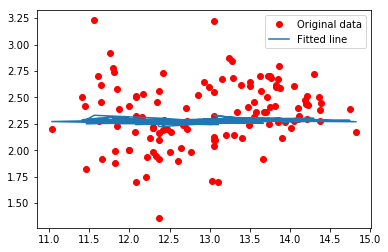

In [51]:
# Initialize the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={Xp: x, Yp: y})    

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost,feed_dict={Xp: train_X, Yp:train_Y})
        print ('Epoch:', '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b) )
        training_cost = sess.run(cost, feed_dict={Xp:train_X, Yp:train_Y})
        print ('Training cost=', training_cost, "W=", sess.run(W), "b=", sess.run(b))
    
        print ('Optimization Finished')

        # Plots
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_Y + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()
